In [2]:
%matplotlib inline
%matplotlib widget

import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif', size = 18)

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
try:
    import mpld3
    mpld3.enable_notebook()
    print("Modul mpld3 je instaliran.")
except:
    print("Modul mpld3 nije instaliran.")
    
def plotSpectrum(x, xlabel = "", ylabel="", title="", show=True):
    n = len(x)
    plt.plot(np.fft.fftshift(np.fft.fftfreq(n)),np.fft.fftshift(abs(np.fft.fft(x))));
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()
        
def plotSpectrumdB(x, xlabel = "", ylabel="", title="", show=True):
    n = len(x)
    plt.plot(np.fft.fftshift(np.fft.fftfreq(n)),20*np.log10(np.fft.fftshift(abs(np.fft.fft(x)))));
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()
    
def stemSpectrum(x, xlabel = "", ylabel="", title="", show=True):
    n = len(x)
    F = np.fft.fftshift(np.fft.fftfreq(n))
    X = np.fft.fftshift(abs(np.fft.fft(x)))
    plt.stem(F, X)#, use_line_collection=True);
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()

def plotSignal(x, xlabel = "", ylabel="", title="", show=True):
    plt.plot(x);
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()

def stemSignal(x, xlabel = "", ylabel="", title="", show=True):
    plt.stem(x)# ,use_line_collection=True);
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title);
    if show:
        plt.show()

def genTestSpectrum(n, freq, amp, randPhase=False):
    # Generate test spectrum
    # Arguments:
    #    n    - number of samples
    #    freq - tuple of digital frequencies (startFreq, endFreq) in range (0, 0.5)
    #    amp  - tuple of amplitudes (ampStart, ampEnd)
    #    randPhase - if True, assign random phase to each sample
    x = np.zeros(n, dtype='complex128')
    freqStart, freqEnd = freq
    ampStart, ampEnd = amp
    indStart = round(n*freqStart)
    indEnd = round(n*freqEnd)
    x[indStart:indEnd] = ampStart - np.linspace(0, 1, num=indEnd-indStart) * (ampStart-ampEnd)
    if randPhase:
        x[indStart:indEnd] *= np.exp(1j*2*np.pi*np.random.rand(indEnd-indStart)) # randomize phase
    x[0] = abs(x[1])/2
    timeDomain = np.fft.ifft(x)
    return(timeDomain)

def compressor(x, D):
    # Downsample the signal by factor D
    #   x - input signal
    #   D - downsampling factor
    return x[0::D]

def expander(x, I):
    # Upsample the signal by factor I
    #   x - input signal
    #   I - upsampling factor
    nx = len(x)
    xI = np.zeros(nx*I)
    xI[::I] = x
    return xI


Modul mpld3 je instaliran.


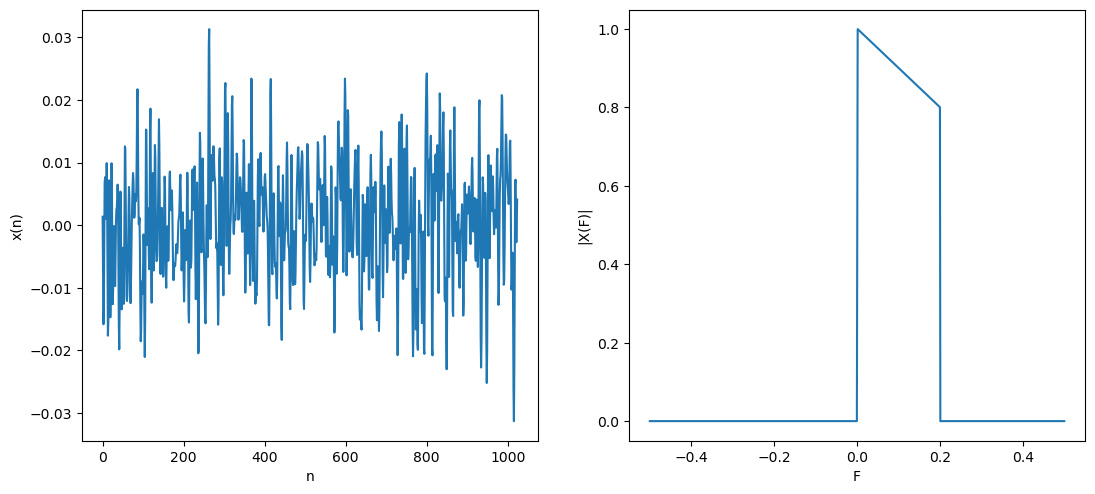

In [16]:
n = 1024
f_max = 0.2
f = [0.0, f_max]
a = [1.0, 0.8]
x = genTestSpectrum(n, f, a, True)
figH = 4
plt.subplots(1,2,figsize=(2*1.618*figH,1.4*figH))
plt.subplot(1,2,1)
plotSignal(x, 'n', 'x(n)', show=False)
plt.subplot(1,2,2)
plotSpectrum(x, 'F', '|X(F)|')

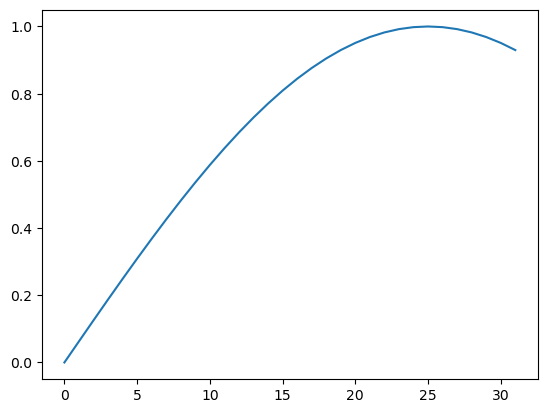

In [45]:
N = 32
n = np.arange(N)
f = 10
fs = 1e3
T = 1/fs

x = np.sin(2*np.pi*n*f/fs)

plt.plot(x)

In [46]:
M = 8
nrz = np.ones(M) / M
rz = np.ones(M) / (M / 2)
rz[M//2:] = 0

x_nrz = signal.lfilter(nrz, 1, x)
x_rz = signal.lfilter(rz, 1, x) 

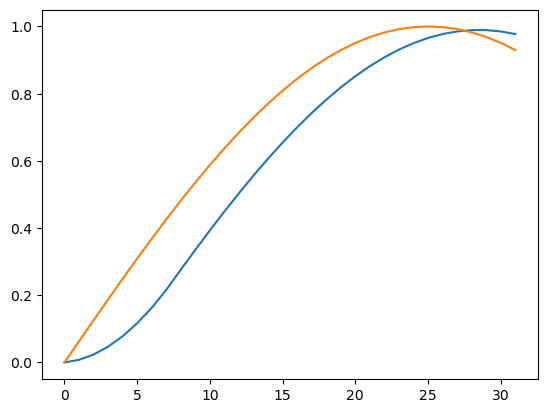

In [47]:
plt.plot(x_nrz)
plt.plot(x)

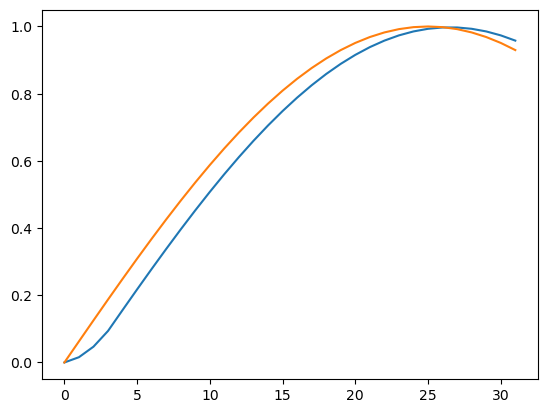

In [48]:
plt.plot(x_rz)
plt.plot(x)